In [1]:
import pandas as pd

In [3]:
df_metadata=pd.DataFrame()
for i in range(0,100):
    str= f'metadata/ai/metadata_{i}.jsonl'
    md = pd.read_json(path_or_buf=str, lines=True)
   # print(i, md.shape)
    df_metadata = df_metadata.append(md, ignore_index = True)

In [4]:
df_metadata.shape

(97584, 25)

In [5]:
df_metadata.rename(columns = {'outbound_citations':'references','has_outbound_citations': 'has_references', 'inbound_citations':'citations', 'has_inbound_citations': 'has_citations'}, inplace = True)

In [6]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97584 entries, 0 to 97583
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   paper_id                    97584 non-null  int64  
 1   title                       97584 non-null  object 
 2   authors                     97584 non-null  object 
 3   abstract                    84627 non-null  object 
 4   year                        94911 non-null  float64
 5   arxiv_id                    6538 non-null   object 
 6   acl_id                      1097 non-null   object 
 7   pmc_id                      3464 non-null   object 
 8   pubmed_id                   7583 non-null   float64
 9   doi                         69903 non-null  object 
 10  venue                       62491 non-null  object 
 11  journal                     66347 non-null  object 
 12  has_pdf_body_text           57717 non-null  float64
 13  mag_id                      930

In [7]:
df_metadata.isna().sum()

paper_id                          0
title                             0
authors                           0
abstract                      12957
year                           2673
arxiv_id                      91046
acl_id                        96487
pmc_id                        94120
pubmed_id                     90001
doi                           27681
venue                         35093
journal                       31237
has_pdf_body_text             39867
mag_id                         4560
mag_field_of_study             3871
references                        0
citations                         0
has_references                    0
has_citations                     0
has_pdf_parse                     0
has_pdf_parsed_abstract       39867
has_pdf_parsed_body_text      39867
has_pdf_parsed_bib_entries    39867
has_pdf_parsed_ref_entries    39867
s2_url                            0
dtype: int64

In [8]:
dic_in=df_metadata.isna().sum()/df_metadata.shape[0]
dic_out = {x:y for x,y in dic_in.items() if y!=0}
dic_out

{'abstract': 0.13277791441219872,
 'year': 0.02739178553861289,
 'arxiv_id': 0.9330013116904411,
 'acl_id': 0.988758403016888,
 'pmc_id': 0.9645023774389244,
 'pubmed_id': 0.922292588949008,
 'doi': 0.2836633054599115,
 'venue': 0.3596183800623053,
 'journal': 0.320103705525496,
 'has_pdf_body_text': 0.4085403344810625,
 'mag_id': 0.04672897196261682,
 'mag_field_of_study': 0.03966838826037055,
 'has_pdf_parsed_abstract': 0.4085403344810625,
 'has_pdf_parsed_body_text': 0.4085403344810625,
 'has_pdf_parsed_bib_entries': 0.4085403344810625,
 'has_pdf_parsed_ref_entries': 0.4085403344810625}

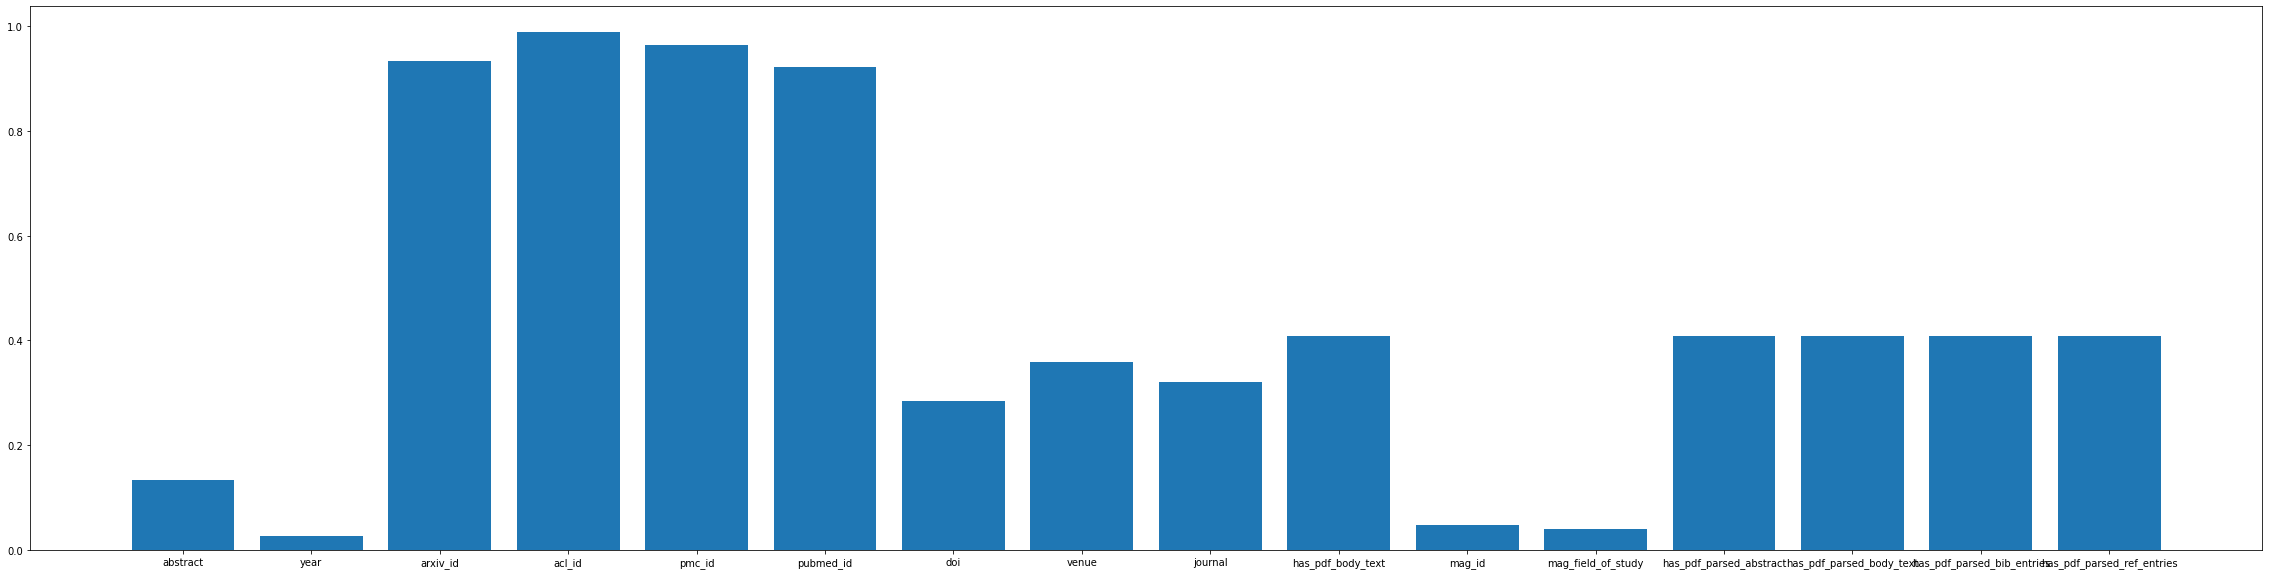

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(40, 10))

plt.bar(dic_out.keys(), dic_out.values())
plt.show()

In [10]:
df_metadata.has_references.value_counts()

True     54791
False    42793
Name: has_references, dtype: int64

In [11]:
df_metadata.has_citations.value_counts()

True     51305
False    46279
Name: has_citations, dtype: int64

In [12]:
df_metadata

,paper_id,title,authors,abstract,year,arxiv_id,acl_id,pmc_id,pubmed_id,doi,...,references,citations,has_references,has_citations,has_pdf_parse,has_pdf_parsed_abstract,has_pdf_parsed_body_text,has_pdf_parsed_bib_entries,has_pdf_parsed_ref_entries,s2_url
0,18984674,A fast structured regression for large networks,"[{'first': 'Fang', 'middle': [], 'last': 'Zhou...",Structured regression has been successfully us...,2016.0,NaN,None,None,NaN,10.1109/BigData.2016.7840594,...,"[118695096, 1480192, 1767868, 13045471, 102455...","[8018578, 202540676]",True,True,True,0.0,0.0,1.0,0.0,https://api.semanticscholar.org/CorpusID:18984674
1,199668943,3D Human Pose Estimation under limited supervi...,"[{'first': 'Rahul', 'middle': [], 'last': 'Mit...",Estimating 3D human pose from monocular images...,2019.0,1908.05293,None,None,NaN,None,...,"[206592419, 2087262, 84843959, 121923341, 8281...",[209854462],True,True,True,1.0,1.0,1.0,1.0,https://api.semanticscholar.org/CorpusID:19966...
2,199669259,Label Propagation Ensemble for Hyperspectral I...,"[{'first': 'Youqiang', 'middle': [], 'last': '...",The imbalance between limited labeled pixels a...,2019.0,NaN,None,None,NaN,10.1109/JSTARS.2019.2926123,...,"[54451996, 20512632, 46275095, 17894508, 54454...",[],True,False,True,0.0,0.0,1.0,0.0,https://api.semanticscholar.org/CorpusID:19966...
3,17786002,FFPred 3: feature-based function prediction fo...,"[{'first': 'Domenico', 'middle': [], 'last': '...",Predicting protein function has been a major g...,2016.0,NaN,None,PMC4999993,27561554.0,10.1038/srep31865,...,"[5913602, 2682835, 26580409, 1298380, 13621547...","[3813773, 21709767, 3517624, 53712748, 2109381...",True,True,True,1.0,1.0,1.0,1.0,https://api.semanticscholar.org/CorpusID:17786002
4,124527934,Influence of SVR Parameter on Non-linear Funct...,"[{'first': 'Wang', 'middle': [], 'last': 'Xi-l...",The theoretical study and experimental demonst...,2011.0,NaN,None,None,NaN,None,...,[],"[45645372, 83461167, 27871023]",False,True,False,NaN,NaN,NaN,NaN,https://api.semanticscholar.org/CorpusID:12452...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97579,59337573,Spatiotemporal Representation Learning for Tra...,"[{'first': 'Tieyun', 'middle': [], 'last': 'Qi...",The increasing proliferation of location-based...,2019.0,NaN,None,None,NaN,10.1145/3295499,...,"[58792962, 9095914, 51609740, 8785978, 9091060...","[211068921, 164212183, 211526208, 210929990, 2...",True,True,True,0.0,0.0,1.0,0.0,https://api.semanticscholar.org/CorpusID:59337573
97580,13013603,Research on the Algorithm of Pedestrian Recogn...,"[{'first': 'Ying', 'middle': [], 'last': 'Yang...",After extracting the candidate region from an ...,2012.0,NaN,None,None,NaN,10.1109/DCABES.2012.108,...,"[38288198, 110116406]","[198334693, 14520202]",True,True,True,0.0,0.0,1.0,0.0,https://api.semanticscholar.org/CorpusID:13013603
97581,45846893,A coefficient comparison of weighted similarit...,"[{'first': 'Wasu', 'middle': [], 'last': 'Kudi...",Machine learning techniques are becoming popul...,2016.0,NaN,None,None,NaN,10.1109/KST.2016.7440525,...,"[117506064, 46373712, 10464157, 14425461, 2394...",[4884708],True,True,True,0.0,0.0,1.0,0.0,https://api.semanticscholar.org/CorpusID:45846893
97582,19939515,The appropriateness of predicate invention as ...,"[{'first': 'Irene', 'middle': [], 'last': 'Sta...",The task of predicate invention in Inductive L...,2004.0,NaN,None,None,NaN,10.1007/BF00993476,...,"[16136188, 2884276, 18510804, 12395063, 124389...",[],True,False,True,1.0,1.0,1.0,1.0,https://api.semanticscholar.org/CorpusID:19939515


In [13]:
df_metadata['year'].min()


1025.0

In [14]:
years=df_metadata['year'].value_counts()
#wykresik- ciąć do 2019, jak to zrobili -> jak tabstarkty rozkładają się w czasie

<AxesSubplot:title={'center':'Liczba artykułów w kolejnych latach'}>

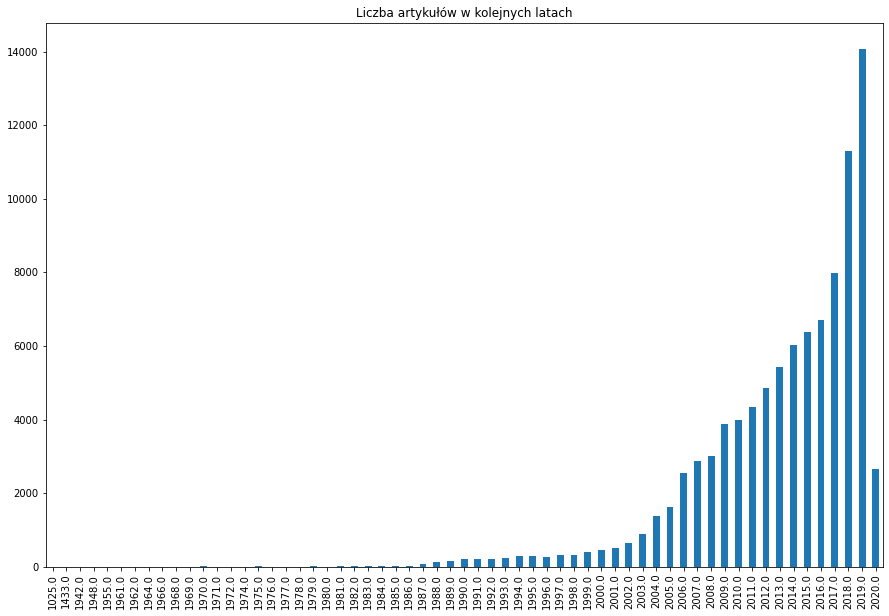

In [15]:
years.sort_index().plot(kind='bar', figsize=(15,10), title="Liczba artykułów w kolejnych latach")


## referencje=outbound

In [16]:
count_references = pd.Series([x for item in df_metadata['references'] for x in item]).value_counts()

In [18]:
df_references = count_references.rename_axis('unique_id').to_frame('counts')
df_references['unique_id'] = df_references.index.astype(int)
df_references['exists_in_df_metadata']  = df_references['unique_id'].isin(df_metadata['paper_id']).astype(int)
df_references

,counts,unique_id,exists_in_df_metadata
unique_id,,,
7138354,4634,7138354,0
961425,4043,961425,1
89141,3879,89141,1
28637672,2962,28637672,0
1033682,2537,1033682,1
...,...,...,...
4556686,1,4556686,0
611750,1,611750,0
37901203,1,37901203,0


In [24]:
df_references['exists_in_df_metadata'].value_counts()

0    417420
1     23301
Name: exists_in_df_metadata, dtype: int64

In [25]:
df_references[df_references['counts']>1]['exists_in_df_metadata'].value_counts()

0    125555
1     11928
Name: exists_in_df_metadata, dtype: int64

In [26]:
i=0
for item in df_metadata['references']:
    for x in item:
        i+=1
i

1081879

In [26]:
i/97584

0.001014510575504181

| Wszystkie artykuły | Liczba referencji wszystkich | Średnia liczba referencji na artykuł | Liczba unikatowych  referencji | Liczba referencji wewnątrz zbioru |
|--------------------|------------------------------|--------------------------------------|--------------------------------|-----------------------------------|
| 97584              | 1081879                      | 1                                    | 440721                         | 23301                             |

# Citations

In [17]:
count_citations = pd.Series([x for item in df_metadata['citations'] for x in item]).value_counts()

In [21]:
df_citations = count_citations.rename_axis('unique_id').to_frame('counts')
df_citations['unique_id'] = df_citations.index.astype(int)
df_citations['exists_in_df_metadata']  = df_citations['unique_id'].isin(df_metadata['paper_id']).astype(int)
df_citations

,counts,unique_id,exists_in_df_metadata
unique_id,,,
210839653,214,210839653,1
52305483,77,52305483,1
155980866,68,155980866,1
59337706,63,59337706,1
59234295,63,59234295,1
...,...,...,...
15393846,1,15393846,0
209455905,1,209455905,0
35853264,1,35853264,0


skąd się wzięło 193 czy ten artykół cytował 193 inne artykuły

In [22]:
df_citations['exists_in_df_metadata'].value_counts()

0    408660
1     40388
Name: exists_in_df_metadata, dtype: int64

In [23]:
df_citations[df_citations['counts']>25]['exists_in_df_metadata'].value_counts()


1    42
0    41
Name: exists_in_df_metadata, dtype: int64

In [25]:
df_citations['counts'].value_counts()

1      285409
2       82184
3       36019
4       18401
5       10087
6        5706
7        3670
8        2297
9        1522
10       1041
11        723
12        525
13        417
14        245
15        172
16        149
17         90
18         82
19         56
20         48
22         34
21         30
23         25
24         17
25         16
26          9
29          9
27          9
33          6
28          5
32          5
36          4
34          4
49          4
35          3
30          3
31          2
37          2
38          2
63          2
45          2
39          2
51          1
68          1
62          1
58          1
77          1
48          1
43          1
42          1
40          1
214         1
Name: counts, dtype: int64

In [27]:
i=0
for item in df_metadata['citations']:
    for x in item:
        i+=1
i

823258

In [ ]:
i/